# **MIS 515 HOMEWORK 3: MOVIE ANALYTICS**

Your assignment is to create a movie analytics tool that allows the user to search for a movie of their choosing and obtain further information about it using online data and text analytics. First, your program should ask the user to specify a movie to analyze. Then, your program should ask the user which type of analysis they would like to run. Your program should support five different types of analyses:

- Background: Your program should print out the movie’s year of release, rating (for example, PG-13), runtime, genre, actors, and plot summary. These should be obtained from the Open Movie Database (OMDb)API, discussed below.
- Reception: your program should print out the movie’s awards, metascore, and IMDb rating. These should be obtained from the OMDb API, discussed below.
- Poster: your program should show an image of the movie’s poster. A URL for themovie’s poster should be obtained from the OMDb API, discussed below. Your program should use the API to obtain this link, then show image of the poster.
- Wordcloud: your program should download the movie’s IMDb reviews from the MIS 515 API, discussed below. Your program should then generate and show a wordcloud based on all the downloaded IMDb reviews.
- Sentiment: your program should download the movie’s IMDb reviews from the MIS 515 API, discussed below, and print out the average review polarity and subjectivity scores.

In [8]:
import requests, json


def background(movie):
  full_url = 'http://www.omdbapi.com/?apikey=23c94049&t=' + movie
  response = requests.get(full_url)
  #EXTRACTS INFO FROM API TO GIVE BACKGROUND
  if response:
    data = json.loads(response.text)
    print('Year:', data['Year'])
    print('Rating:', data['Rated'])
    print('Movie Runtime:', data['Runtime'])
    print('Genre', data['Genre'])
    print('Actors:', data['Actors'])
    print('Plot:', data['Plot'])
  else:
    print('Sorry, could not connect.')

In [9]:
import requests, json
def reception(movie):
  full_url = 'http://www.omdbapi.com/?apikey=23c94049&t=' + movie
  response = requests.get(full_url)
  #RECEPTION INFO ON MOVIE EXTRACTED FROM API
  if response:
    data = json.loads(response.text)
    print('Awards:', data['Awards'])
    print('Metascore:', data['Metascore'])
    print('IMDb Rating:', data['imdbRating'])
  else:
    print('Sorry, connection error.')

In [14]:
import requests, json
import matplotlib.pyplot as plt
import skimage.io
def poster(movie):
  full_url = 'http://www.omdbapi.com/?apikey=23c94049&t=' + movie
  response = requests.get(full_url)
  #FUNCTION TO PRINT OUT POSTER USING LINK IN DATA FROM THE API
  if response: 
    data = json.loads(response.text)
    poster_url = data['Poster']
    image = skimage.io.imread(poster_url)
    plt.imshow(image, interpolation = "bilinear")
    plt.axis("off")
    plt.show()
    plt.pause(3)
    plt.close()
  else:
    print('Sorry, connection error.')

  

In [11]:
import requests, json, wordcloud
import matplotlib.pyplot as plt
def cloudCreator(movie):
  full_url = "https://dgoldberg.sdsu.edu/515/imdb/" + movie + ".json"
  response = requests.get(full_url)
  #CLOUD CREATOR FUNCTION BASED ON A WHOLE STRING OF THE REVIEWS
  if response: 
    data = json.loads(response.text)
    text = ''
    for i in range(len(data)):
      text = text + data[i]['Review text']
    cloud = wordcloud.WordCloud()
    cloud.generate(text)
    plt.imshow(cloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
    plt.close()
  else:
    print('Sorry, the tool could not successfully load any IMDb reviews for this movie. Please try another analysis or movie.')

In [12]:
import requests, textblob, json 
def sentimentAnalysis(movie):
  full_url = "https://dgoldberg.sdsu.edu/515/imdb/" + movie + ".json"
  response = requests.get(full_url)
  #SENTIMENT ANALYSIS TOOL, TURNS THE WHOLE REVIEW INTO ONE STRING AND TAKES SENTIMENT ANALYSIS OF THAT
  if response:
    data = json.loads(response.text)
    text = ''
    for i in range(len(data)):
      text = text + data[i]['Review text']
    blob = textblob.TextBlob(text)
    print('Average IMDb review polarity:', blob.polarity)
    print('Average IMDb review subjectivity:', blob.subjectivity)
  else:
    print('Sorry, the tool could not successfully load any IMDb reviews for this movie. Please try another analysis or movie.')


Welcome to the movie analytics tool!
What movie would you like to analyze?deadpool
deadpool
What would you like to see(background/reception/poster/wordcloud/sentiment)?background
Year: 2016
Rating: R
Movie Runtime: 108 min
Genre Action, Adventure, Comedy, Sci-Fi
Actors: Ryan Reynolds, Karan Soni, Ed Skrein, Michael Benyaer
Plot: A wisecracking mercenary gets experimented on and becomes immortal but ugly, and sets out to track down the man who ruined his looks.
Would you like to further analyze this movie (yes/no)?yes
deadpool
What would you like to see(background/reception/poster/wordcloud/sentiment)?reception
Awards: Nominated for 2 Golden Globes. Another 28 wins & 76 nominations.
Metascore: 65
IMDb Rating: 8.0
Would you like to further analyze this movie (yes/no)?yes
deadpool
What would you like to see(background/reception/poster/wordcloud/sentiment)?poster


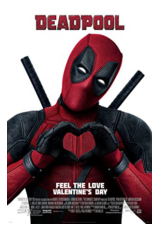

Would you like to further analyze this movie (yes/no)?yes
deadpool
What would you like to see(background/reception/poster/wordcloud/sentiment)?wordcloud


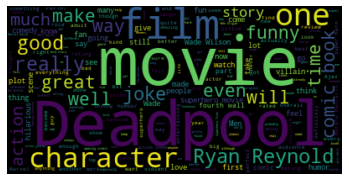

Would you like to further analyze this movie (yes/no)?sentiment
Would you like to analyze another movie (yes/no)?yes
What movie would you like to analyze?deadpool
deadpool
What would you like to see(background/reception/poster/wordcloud/sentiment)?sentiment
Average IMDb review polarity: 0.15558328475840896
Average IMDb review subjectivity: 0.5418585425719787
Would you like to further analyze this movie (yes/no)?no
Would you like to analyze another movie (yes/no)?no


In [15]:
import textblob
print('Welcome to the movie analytics tool!')
choice = True
movie_choice = True
while choice == True:
  movie_input = input('What movie would you like to analyze?')
  movie_choice = True
  while movie_choice == True:
    #NESTED LOOP 
    analysis_list = ['background', 'reception', 'poster', 'wordcloud', 'sentiment']
    movie = textblob.TextBlob(movie_input)
    movie = movie.lower()
    print(movie)
    choice_input = input('What would you like to see(background/reception/poster/wordcloud/sentiment)?')
    analysis = textblob.TextBlob(choice_input)
    analysis = analysis.lower().correct()
    movie = str(movie)
    if analysis not in analysis_list:
      print('Sorry, that analysis is not supported. Please try again.]')
    elif analysis == 'background':
      background(movie)
    elif analysis == 'reception':
      reception(movie)
    elif analysis == 'poster':
      poster(movie)
    elif analysis == 'wordcloud':
      cloudCreator(movie)
    elif analysis == 'sentiment':
      sentimentAnalysis(movie)
    choice_input = input('Would you like to further analyze this movie (yes/no)?')
    user_choice = textblob.TextBlob(choice_input)
    user_choice = user_choice.lower().correct()
    if user_choice == 'yes':
      movie_choice = True
    else:
      movie_choice = False
    ##NESTED LOOP
  
  user_input = input('Would you like to analyze another movie (yes/no)?')
  user_choice = textblob.TextBlob(user_input)
  user_choice = user_choice.lower().correct()
  if user_choice == 'yes':
    choice = True
  else:
    choice = False


    